## Imports

In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../source/')

import helpers
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
revenue_df = pd.read_csv("../data/processed/modeling/data_df_modeling.csv", index_col=0)

In [3]:
revenue_df.drop(["title", "status", "vote_average", "vote_count", "crew", "original_language", "revenue"], axis=1, inplace=True)

In [4]:
revenue_df = revenue_df[revenue_df.budget > 0.0]

### Dataset Split

In [5]:
X = revenue_df.drop(["budget", "success"], axis=1)
y = revenue_df.budget

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

## Modeling

### Imports

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

### LinearRegression

CV Mean:  -12400859334.004255
STD:  24801718668.740448


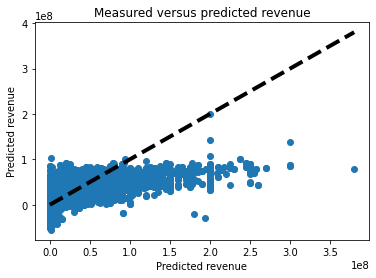

In [8]:
helpers.predict_linear(LinearRegression(), X_train, X_train, y_train, X, y, "LinearRegression")

### ElasticNet

CV Mean:  0.20625525190172347
STD:  0.005989057171014842


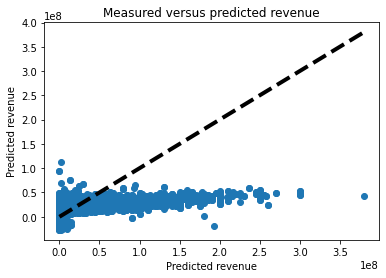

In [9]:
helpers.predict_linear(ElasticNet(), X_train, X_train, y_train, X, y, "ElasticNet")

### Lasso

CV Mean:  0.3573887852814629
STD:  0.017616671741721147


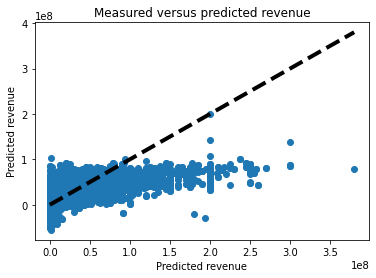

In [10]:
helpers.predict_linear(Lasso(), X_train, X_train, y_train, X, y, "Lasso")

### RandomForestRegressor

CV Mean:  0.7618700212042965
STD:  0.015703154064752797


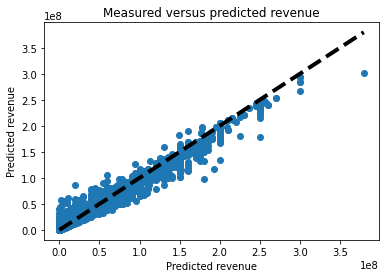

In [11]:
helpers.predict_linear(RandomForestRegressor(), X_train, X_train, y_train, X, y, "RandomForestRegressor")

### XGBRegressor

CV Mean:  0.7028048702955509
STD:  0.011856939771628215


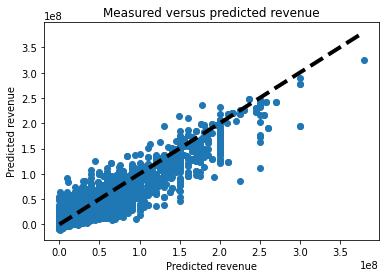

In [12]:
helpers.predict_linear(XGBRegressor(), X_train, X_train, y_train, X, y, "XGBRegressor")

## Conclusion 

Wow! Visualizing our results, it's clear we got a clear winner. With RandomForestRegressor the r2_score is 0.75 and with 0.015 STD. Clear winner!